In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import plotly.express as px
import matplotlib.pyplot as plt 
%matplotlib inline 

pd.set_option('display.precision', 2)
sns.set(rc={"axes.facecolor":"Beige" , "axes.grid" : False})
#plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("/kaggle/input/titanic/brain_stroke.csv")
df = df.dropna()
df.head(2)

gender   age  hypertension  heart_disease ever_married work_type  \
0   Male  67.0             0              1          Yes   Private   
1   Male  80.0             0              1          Yes   Private   

  Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
0          Urban             228.69  36.6  formerly smoked       1  
1          Rural             105.92  32.5     never smoked       1

In [3]:
wine = pd.read_csv("/kaggle/input/titanic/WineQT.csv")
wine = wine.dropna()
wine = wine.drop('Id',axis =1)
wine.head(2)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70          0.0             1.9       0.08   
1            7.8              0.88          0.0             2.6       0.10   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0      1.0  3.51       0.56   
1                 25.0                  67.0      1.0  3.20       0.68   

   alcohol  quality  
0      9.4        5  
1      9.8        5

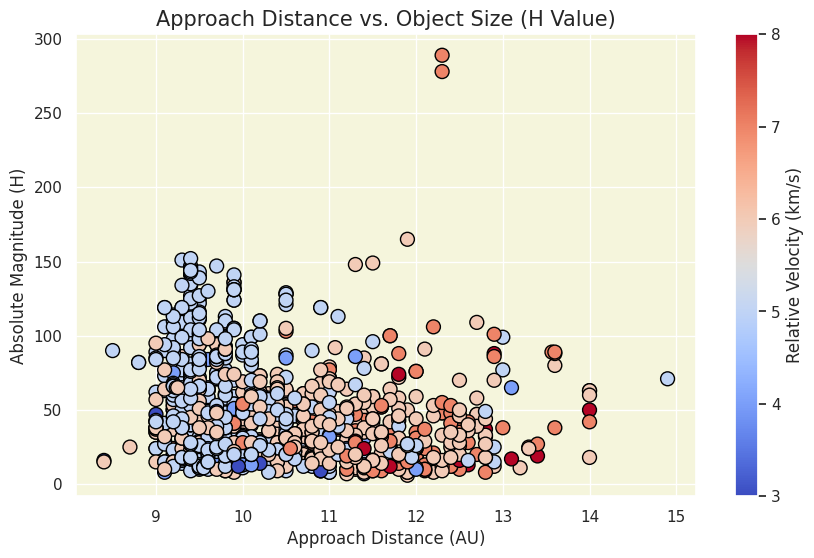

In [4]:
# Scatter plot for Approach Distance vs. Object Size (H value) with proper color mapping
plt.figure(figsize=(10, 6))

# Create scatter plot using plt.scatter for better colorbar control
sc = plt.scatter(x=wine['alcohol'], y=wine['total sulfur dioxide'], c=wine['quality'], cmap='coolwarm', s=100, edgecolor='black')

# Adding title and labels
plt.title('Approach Distance vs. Object Size (H Value)', fontsize=15)
plt.xlabel('Approach Distance (AU)')
plt.ylabel('Absolute Magnitude (H)')

# Adding the colorbar for Relative Velocity (v_rel)
cbar = plt.colorbar(sc)
cbar.set_label('Relative Velocity (km/s)')

plt.grid(True)
plt.show()

Cluster centers:
 [[-0.53911335 -0.69454298  0.94272637]
 [-0.28632051 -0.83074513 -0.89669232]
 [ 1.88514443 -0.43490059 -0.52499135]
 [-0.12797965  0.81195425  0.62847951]
 [-0.23169915  0.87083149 -0.99556908]]


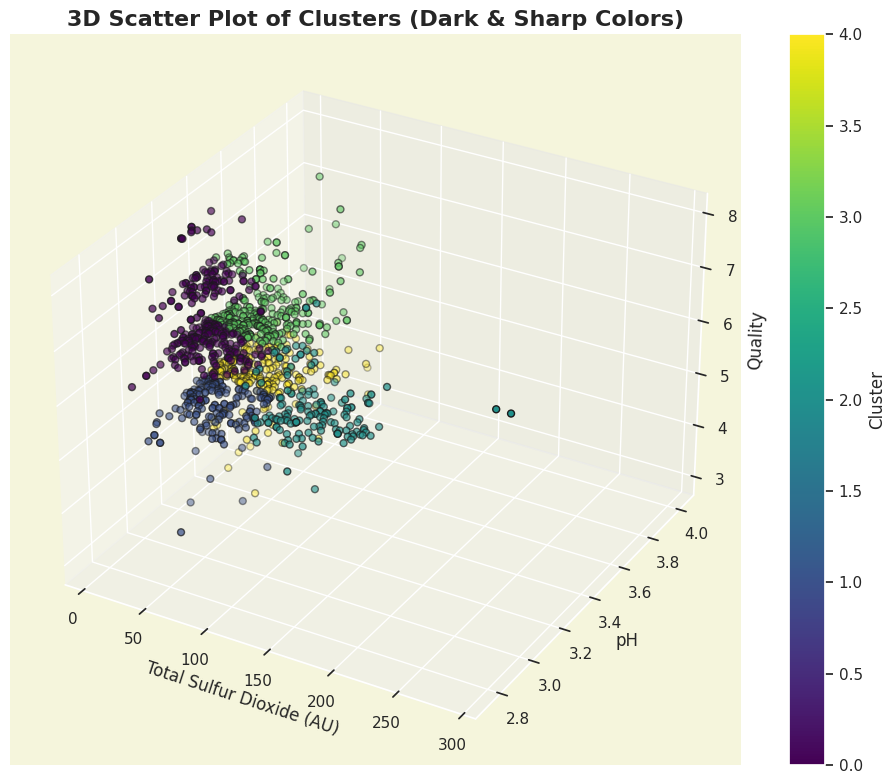

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

scaler = StandardScaler()
X_scaled = scaler.fit_transform(wine[['total sulfur dioxide', 'pH', 'quality']])

kmeans = KMeans(n_clusters=5, random_state=42)
wine['cluster'] = kmeans.fit_predict(X_scaled)

print("Cluster centers:\n", kmeans.cluster_centers_)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    wine['total sulfur dioxide'], wine['pH'], wine['quality'],
    c=wine['cluster'], cmap="viridis", s=25, edgecolors='k'  
)

ax.set_xlabel('Total Sulfur Dioxide (AU)')
ax.set_ylabel('pH')
ax.set_zlabel('Quality')
ax.set_title('3D Scatter Plot of Clusters (Dark & Sharp Colors)', fontsize=16, fontweight='bold')

plt.colorbar(scatter, label='Cluster')
plt.tight_layout()  # Improve layout for readability
plt.show()

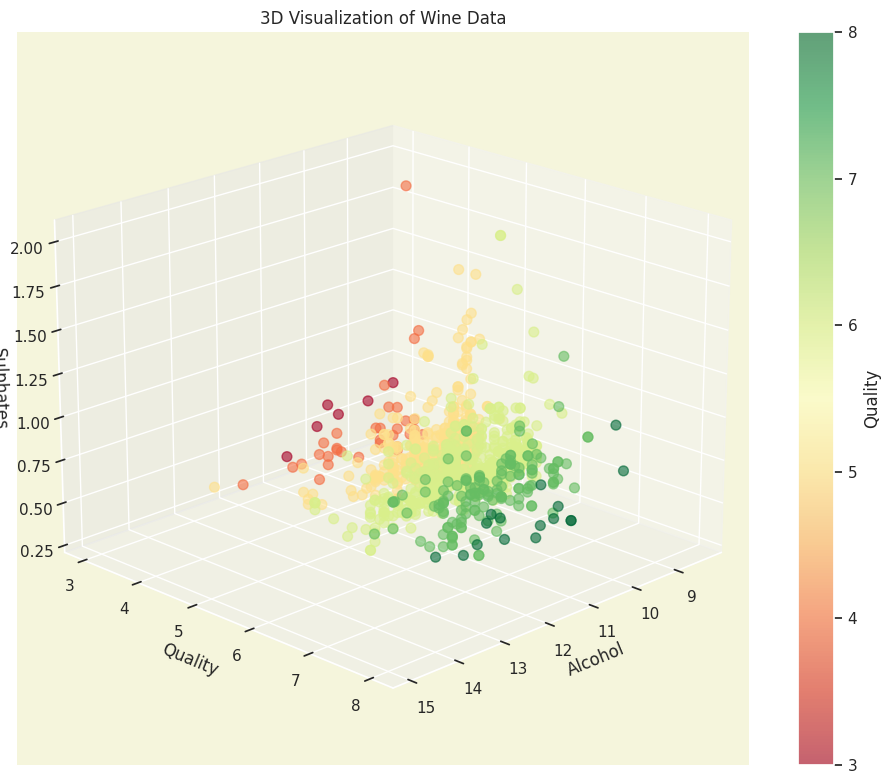

In [6]:
from mpl_toolkits.mplot3d import Axes3D

x = wine["alcohol"]
y = wine["quality"]
z = wine["sulphates"]

# Create a 3D figure and axes
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Create the scatter plot
scatter = ax.scatter(x, y, z, c=y, cmap='RdYlGn', s=50, alpha=0.6)

# Set labels and title
ax.set_xlabel("Alcohol")
ax.set_ylabel("Quality")
ax.set_zlabel("Sulphates")
ax.set_title("3D Visualization of Wine Data")

# Add a color bar
cbar = fig.colorbar(scatter, ax=ax, label="Quality")

# Adjust the viewing angle for better visibility
ax.view_init(elev=20, azim=45)

# Show the plot
plt.tight_layout()
plt.show()

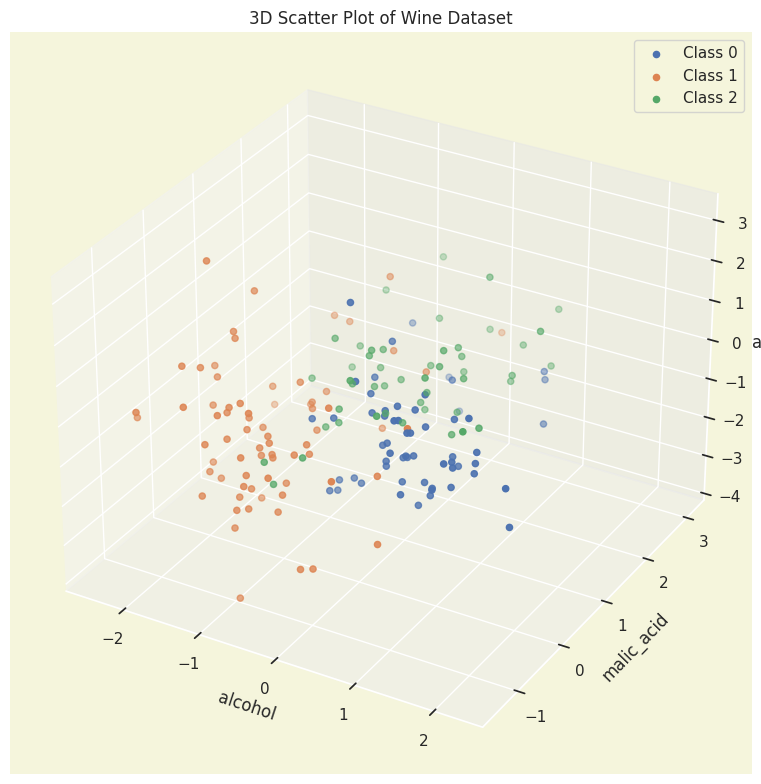

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler

# Load the wine dataset
wine = load_wine()
X = wine.data
y = wine.target

# Create a DataFrame
df = pd.DataFrame(X, columns=wine.feature_names)
df['target'] = y

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Select three features for the 3D plot
selected_features = ['alcohol', 'malic_acid', 'ash']
feature_indices = [wine.feature_names.index(feature) for feature in selected_features]

# Create the 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot each wine class
for target in np.unique(y):
    indices = y == target
    ax.scatter(X_scaled[indices, feature_indices[0]], 
               X_scaled[indices, feature_indices[1]], 
               X_scaled[indices, feature_indices[2]], 
               label=f'Class {target}')

# Set labels and title
ax.set_xlabel(selected_features[0])
ax.set_ylabel(selected_features[1])
ax.set_zlabel(selected_features[2])
ax.set_title('3D Scatter Plot of Wine Dataset')

# Add a legend
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()

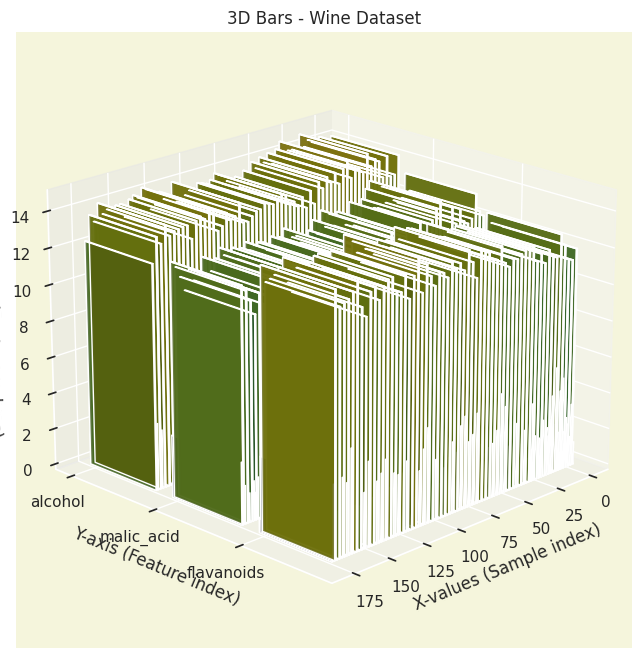

In [8]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import load_wine

wine = load_wine()
X = wine.data
y = wine.target

df = pd.DataFrame(X, columns=wine.feature_names)
df['target'] = y

selected_features = ['alcohol', 'malic_acid', 'flavanoids']

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

x_pos = np.arange(len(df))
y_pos = np.arange(len(selected_features))
x_pos, y_pos = np.meshgrid(x_pos, y_pos)
x_pos = x_pos.flatten()
y_pos = y_pos.flatten()

z_pos = np.zeros_like(x_pos)
dx = dy = 0.8
dz = df[selected_features].values.flatten()

colors = plt.cm.viridis(dz / float(max(dz)))
ax.bar3d(x_pos, y_pos, z_pos, dx, dy, dz, color=colors, alpha=0.8)

ax.set_xlabel('X-values (Sample index)')
ax.set_ylabel('Y-axis (Feature index)')
ax.set_zlabel('Z-values (Feature values)')
ax.set_title('3D Bars - Wine Dataset')

ax.set_yticks(np.arange(len(selected_features)))
ax.set_yticklabels(selected_features)

ax.view_init(elev=20, azim=45)
plt.tight_layout()
plt.show()

In [9]:
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.express as px

wine = pd.read_csv("/kaggle/input/titanic/WineQT.csv")
wine = wine.dropna()
wine = wine.drop('Id',axis =1)
display(wine.head(2))

wine = wine[['volatile acidity','residual sugar','free sulfur dioxide','quality']]

from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = "euclidean", linkage = "ward")
cluster = hc.fit_predict(wine)

wine["cluster"] = cluster

display(cluster)


hc_data0 = wine[wine['cluster']==0]
hc_data1 = wine[wine['cluster']==1]
hc_data2 = wine[wine['cluster']==2]
hc_data3 = wine[wine['cluster']==3]
hc_data4 = wine[wine['cluster']==4]


trace0= go.Scatter3d(
        x=hc_data0['volatile acidity'],
        y=hc_data0['residual sugar'],
        z=hc_data0['free sulfur dioxide'],
        mode="markers",
        marker=dict(
                    size=2,
                    color="rgb(255,0,0)",                                     
        )
)
trace1= go.Scatter3d(
        x=hc_data1['volatile acidity'],
        y=hc_data1['residual sugar'],
        z=hc_data1['free sulfur dioxide'],
        mode="markers",
        marker=dict(
                    size=2,
                    color="rgb(0,255,0)",                                   
        )
)
trace2= go.Scatter3d(
        x=hc_data2['volatile acidity'],
        y=hc_data2['residual sugar'],
        z=hc_data2['free sulfur dioxide'],
        mode="markers",
        marker=dict(
                    size=2,
                    color="rgb(0,0,255)",                                  
        )
)
trace3= go.Scatter3d(
        x=hc_data3['volatile acidity'],
        y=hc_data3['residual sugar'],
        z=hc_data3['free sulfur dioxide'],
        mode="markers",
        marker=dict(
                    size=2,
                    color="rgb(255,255,0)",                                    
        )
)
trace4= go.Scatter3d(
        x=hc_data4['volatile acidity'],
        y=hc_data4['residual sugar'],
        z=hc_data4['free sulfur dioxide'],
        mode="markers",
        marker=dict(
                    size=2,
                    color="rgb(127,0,255)",                                   
        )
)

data_plot_hc=[trace0,trace1,trace2,trace3,trace4]

layout = go.Layout(
    margin=dict(l=0, r=0, b=0, t=0))

fig=go.Figure(data = data_plot_hc, layout = layout)
iplot(fig)
print("x : volatile acidity")
print("y : residual sugar")
print("z : Free sulfur dioxide")

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70          0.0             1.9       0.08   
1            7.8              0.88          0.0             2.6       0.10   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0      1.0  3.51       0.56   
1                 25.0                  67.0      1.0  3.20       0.68   

   alcohol  quality  
0      9.4        5  
1      9.8        5

array([0, 3, 2, ..., 4, 4, 4])

x : volatile acidity
y : residual sugar
z : Free sulfur dioxide


In [10]:
import itertools  
import plotly.express as px
import plotly.graph_objects as go
from plotly import subplots


df_flights = sns.load_dataset("flights")
df_flights['passengers'] = df_flights['passengers'].map(lambda x: [i for i in range(x)])
df_flights = df_flights.explode('passengers')
df_flights['passenger_id'] = df_flights['year'].astype(str) + '-' + df_flights['month'].astype(str) + '-' + df_flights['passengers'].astype(str)
df_flights = df_flights.drop(columns=['passengers'], axis=1)

df_growth = df_flights['passenger_id'].groupby(df_flights['year']).count().to_frame()
df_growth = df_growth.reset_index(level=0)
df_growth = df_growth.rename(columns={"passenger_id": "passengers"})
df_growth['prev_passengers'] = df_growth['passengers'].shift(1)
df_growth['passenger_growth_yoy'] = (df_growth['passengers'] - df_growth['prev_passengers']) / df_growth['prev_passengers']

fig = subplots.make_subplots(
    rows=2, cols=1, row_heights=[0.3, 0.7],
    subplot_titles=['YoY Growth', 'Monthly and Yearly Distribution']
)

fig.add_trace(
    go.Bar(
        x=df_growth['year'], y=df_growth['passenger_growth_yoy'], name='YoY Growth',
        marker_color='green'
    ),
    row=1, col=1
)

fig.add_trace(
    go.Histogram2d(
        x=df_flights['year'], y=df_flights['month'], z=df_flights['passenger_id'],
        name='Distribution',
        histfunc='count', texttemplate="%{z}"
    ),
    row=2, col=1
)

fig.update_layout(
    title='Flight Passengers Evolution 1949-1960',
    height=800,
    yaxis1_tickformat='.2%',
    xaxis2_title='Year', yaxis2_title='Month',
    plot_bgcolor='white'
)

fig.show()

In [11]:
df_europe = px.data.gapminder()
df_europe = df_europe[(df_europe['continent'] == 'Europe') & (df_europe['year'] == 2007)]
display(df_europe.head(2))

fig = px.bar(df_europe, x='country', y='pop', text='pop', color='country')
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.show()

country continent  year  lifeExp      pop  gdpPercap iso_alpha  iso_num
23  Albania    Europe  2007    76.42  3600523    5937.03       ALB        8
83  Austria    Europe  2007    79.83  8199783   36126.49       AUT       40

In [12]:
import plotly.express as px
import plotly.graph_objects as go

# Load the stock data
df_stocks = px.data.stocks()
display(df_stocks.head(2))

fig = go.Figure()

# Subtract 1 to show performance
fig.add_trace(go.Scatter(x=df_stocks.date, y=df_stocks.GOOG - 1, mode='lines', name='Google'))
fig.add_trace(go.Scatter(x=df_stocks.date, y=df_stocks.AAPL - 1, mode='lines', name='Apple'))
fig.add_trace(go.Scatter(x=df_stocks.date, y=df_stocks.AMZN - 1, mode='lines+markers', name='Amazon'))

# Update layout for better interactivity
fig.update_layout(
    title='Some Tech Stocks Performance (Jan 2018 - Jan 2020)',
    xaxis_title='Date',
    yaxis_title='Price',
    hovermode='x unified',  # Show all hover data at once
    template='plotly_dark',  # Use a dark theme
    legend=dict(
        x=0,
        y=1,
        traceorder='normal',
        bgcolor='rgba(0,0,0,0)',
        bordercolor='rgba(0,0,0,0)'
    )
)

# Add range slider and buttons for interactivity
fig.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1, label='1m', step='month', stepmode='backward'),
                dict(count=6, label='6m', step='month', stepmode='backward'),
                dict(count=1, label='YTD', step='year', stepmode='todate'),
                dict(count=1, label='1y', step='year', stepmode='backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict(visible=True),
        type='date'
    )
)

fig.show()


date  GOOG  AAPL  AMZN    FB  NFLX  MSFT
0  2018-01-01  1.00  1.00  1.00  1.00  1.00  1.00
1  2018-01-08  1.02  1.01  1.06  0.96  1.05  1.02

In [13]:
fig = go.Figure()
# we subtract 1 to stocks price data to show performance
fig.add_trace(go.Scatter(x=df_stocks.date, y=df_stocks.GOOG - 1, mode='markers', name='Google'))
fig.add_trace(go.Scatter(x=df_stocks.date, y=df_stocks.AAPL - 1, mode='lines', name='Apple'))
fig.add_trace(go.Scatter(x=df_stocks.date, y=df_stocks.AMZN - 1, mode='lines+markers', name='Amazon'))

fig.update_layout(
    title='Some Tech Stocks Performance (Jan 2018 - Jan 2020)',
    xaxis=dict(
        showline=True, showgrid=False, showticklabels=True,
        linecolor='rgb(204, 204, 204)', linewidth=2, ticks='outside', 
        tickfont=dict(
            family='Arial', size=12, color='rgb(82, 82, 82)'
        )
    ),
    yaxis=dict(
        showgrid=False, showline=False, tickformat='.2%'
    ),
    margin=dict(
        autoexpand=False, l=100, r=20, t=110
    ),
    showlegend=False,
    plot_bgcolor='white'
)

In [14]:
df_asia = px.data.gapminder()
df_asia = df_asia[(df_asia['continent'] == 'Asia') & (df_asia['year'] == 2007)]
display(df_asia.head(2))

fig = px.pie(
    df_asia, values='pop', names='country',
    hole=0.5
)
fig.update_traces(textfont_size=15)  
fig.update_layout(height=1300, title='Population of Asia')
fig.show()

country continent  year  lifeExp       pop  gdpPercap iso_alpha  \
11  Afghanistan      Asia  2007    43.83  31889923     974.58       AFG   
95      Bahrain      Asia  2007    75.64    708573   29796.05       BHR   

    iso_num  
11        4  
95       48

In [15]:
tot_asia_pop = df_asia['pop'].sum()
asia_pop_perc = df_asia['pop'] / tot_asia_pop
pull_array = asia_pop_perc.map(lambda x: 0.6 if x < 0.015 else 0).values
pull_array

fig = go.Figure()
fig.add_traces(
    go.Pie(
        values=df_asia['pop'], labels=df_asia['country'], hole=0.5
    )
)
fig.update_traces(
    pull=pull_array,
    rotation=135,
    hoverinfo='label+value+percent',
    marker=dict(
        colors=px.colors.sequential.Agsunset
    )
)
fig.update_traces(textfont_size=15)  
fig.update_layout(
    height=1500, title='Population of Asia'
)
fig.show()

In [16]:
df_tips = px.data.tips()
display(df_tips.head(2))

fig = go.Figure()

df_yes = df_tips.loc[df_tips['smoker'] == 'Yes']
fig.add_trace(
    go.Violin(
        x=df_yes['day'], y=df_yes['total_bill'], name='Smoker',
        legendgroup='Yes', scalegroup='Yes',
        side='negative', line_color='red'
    )
)

df_no = df_tips.loc[df_tips['smoker'] == 'No']
fig.add_trace(
    go.Violin(
        x=df_no['day'], y=df_no['total_bill'], name='Non Smoker',
        legendgroup='Yes', scalegroup='Yes',
        side='positive', line_color='green'
    )
)

fig.update_layout(
    height=700, title='Total Bill by Day | Smokers vs. Non Smokers'
)

fig.show()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3

In [17]:
df_flights = sns.load_dataset("flights")
display(df_flights.head(2))

fig = px.scatter_3d(
    df_flights, x='year', y='month', z='passengers',
    color='month', opacity=0.7
)

fig.show()

year month  passengers
0  1949   Jan         112
1  1949   Feb         118

In [18]:
fig = px.line_3d(
    df_flights, x='year', y='month', z='passengers',
    color='month'
)

fig.show()

In [19]:
month_to_int = {
    'Jan': 1,
    'Feb': 2,
    'Mar': 3,
    'Apr': 4,
    'May': 5,
    'Jun': 6,
    'Jul': 7,
    'Aug': 8,
    'Sep': 9,
    'Oct': 10,
    'Nov': 11,
    'Dec': 12
}
df_flights['month'].replace(month_to_int)

#=========================================================================#========================================

from scipy.interpolate import griddata
fig = go.Figure()

xi = np.linspace(
    min(df_flights['year']), 
    max(df_flights['year']), 
    num=12
)
yi = np.linspace(
    min(df_flights['month'].replace(month_to_int)), 
    max(df_flights['month'].replace(month_to_int)), 
    num=12
)

x_grid, y_grid = np.meshgrid(xi,yi)

z_grid = griddata(
    (df_flights['year'],df_flights['month'].replace(month_to_int)), 
    df_flights['passengers'], 
    (x_grid,y_grid), 
    method='cubic'
)

fig.add_trace(
    go.Surface(
        x=x_grid, y=y_grid, z=z_grid,
        colorscale='viridis'
    )
)

fig.show()

In [20]:
df_world = px.data.gapminder()
df_world_now = df_world[df_world['year'] == 2007]

fig = px.scatter_geo(
    df_world_now, locations="iso_alpha", color="continent",
    size="pop", hover_name="country",
    projection="orthographic"
)
fig.show()

In [21]:
df_wind = px.data.wind()
display(df_wind.head(2))

px.scatter_polar(
    df_wind, r='strength', theta='direction',
    color='frequency', size='frequency'
)

direction strength  frequency
0         N      0-1        0.5
1       NNE      0-1        0.6

In [22]:
px.line_polar(
    df_wind, r='frequency', theta='direction',
    color='strength', line_close=True, template='plotly_dark'
)

In [23]:
px.scatter(
    df_world, x='gdpPercap', y='lifeExp',
    animation_frame='year',
    size='pop', color='continent', hover_name='country',
    log_x=True, size_max=50,
    range_x=[100, 100_000], range_y=[25, 90]
)

In [24]:
px.bar(
    df_world, x='continent', y='pop', color='continent',
    animation_frame='year',
    range_y=[0, 4_000_000_000]
)

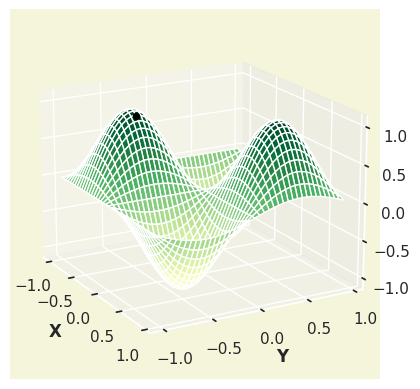

In [25]:
import numpy as np
import matplotlib.pyplot as plt


# let's define a z-function which depends on x and y (variable)
def z_function(x, y):
    return np.sin(np.pi * x) * np.sin(np.pi * y)


def calculate_gradient(x, y):
    """
    now we'll have partial derivatives, because if we've multidimensional function,
    z which depends on x and y variable, we can compute the partial derivative w.r.t 'x' and
    partial derivative w.r.t 'y'.
    """
    return np.pi * np.cos(np.pi * x) * np.sin(np.pi * y), np.pi * np.sin(np.pi * x) * np.cos(np.pi * y)


# let's generate some values
x = np.arange(-1, 1, 0.05)  # step-size = 0.05
y = np.arange(-1, 1, 0.05)

"""
The numpy.meshgrid() function is used to create a rectangular grid from two 1-D arrays
"""
X, Y = np.meshgrid(x, y)  # to visualize multi-dimensional data

Z = z_function(X, Y)

# now let's define initial position from where we roll down to global minima
current_pos = (-0.40, -0.50, z_function(-0.35, -0.40))

# define a learning rate
learning_rate = 0.01

ax = plt.subplot(projection='3d', computed_zorder=False)

for _ in range(70):
    # compute the gradient
    X_derivative, Y_derivative = calculate_gradient(current_pos[0], current_pos[1])
    X_new, Y_new = current_pos[0] - learning_rate * X_derivative, current_pos[1] - learning_rate * Y_derivative
    current_pos = X_new, Y_new, z_function(X_new, Y_new)

    ax.plot_surface(X, Y, Z, cmap='YlGn', zorder=0)
    # ax.contour(X, Y, Z, 10, lw=3, cmap="YlGn", linestyles="solid", offset=1)
    ax.scatter(current_pos[0], current_pos[1], current_pos[2], color="black", zorder=1, s=20)

    ax.view_init(elev=18, azim=-29)  # rotating the initial default view of figure plot

    ax.set_xlabel('X', fontweight='bold')
    ax.set_ylabel('Y', fontweight='bold')
    ax.set_zlabel('Z', fontweight='bold')

    plt.pause(0.3)
    # ax.clear()